# Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)

Por Juan Pablo Bernal Lafarga - A01742342

## 1. Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de análisis (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).

https://github.com/JPBL101203/TC3006C_A01742342/tree/main/Portafolio_Analisis/Machine_Learning

## 2. Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula.

In [16]:
seed = 2342 # Mi matrícula es A01742342

## 3. Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba.

In [17]:
from google.colab import drive
drive.mount("/content/gdrive")

# Juan Pablo Bernal Lafarga
%cd "/content/gdrive/MyDrive/TC300_Titanic"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/TC300_Titanic


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Valhalla23.csv')

X = data[['Celsius']]
y = data['Valks']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=seed)

En el bloque anterior se lee la base de datos "Valhalla" y se establece la columna "Valks" como la variable objetivo, y "Celsius" como la variable independiente. Después, se utiliza "train_test_split" para dividir los datos en 40% para entrenamiento y el 60% restante se asigna a variables temporales, que posteriormente se dividen en otro "train_test_split" que separa ese 60% en un 20% de los datos totales para prueba y 40% de los datos totales para validación, todo esto con la semilla de los 4 últimos dígitos de mi matrícula.

## 4. Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

SGDRegressor es un modelo lineal ajustado minimizando una pérdida empírica regularizada con SGD.

SGD significa Descenso de Gradiente Estocástico: el gradiente de la pérdida se estima una muestra a la vez y el modelo se actualiza continuamente con una tasa de aprendizaje decreciente.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [19]:
import numpy as np
from sklearn.linear_model import SGDRegressor

# Inicializar el modelo
sgd_reg = SGDRegressor(max_iter=1000000, random_state=seed, learning_rate='constant', eta0=1e-4)

# Entrenar el modelo
sgd_reg.fit(X_train,y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=2342)

## 5. Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

In [20]:
from sklearn.metrics import mean_squared_error

print("El error medio cuadrático para los datos de entrenamiento es ", mean_squared_error(y_train, sgd_reg.predict(X_train)))
print("El error medio cuadrático para los datos de validación es ", mean_squared_error(y_val, sgd_reg.predict(X_val)))
print("El error medio cuadrático para los datos de prueba es ", mean_squared_error(y_test, sgd_reg.predict(X_test)))

El error medio cuadrático para los datos de entrenamiento es  677.9026786830233
El error medio cuadrático para los datos de validación es  1315.3818826335985
El error medio cuadrático para los datos de prueba es  1556.266964215807


## 6. Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta).

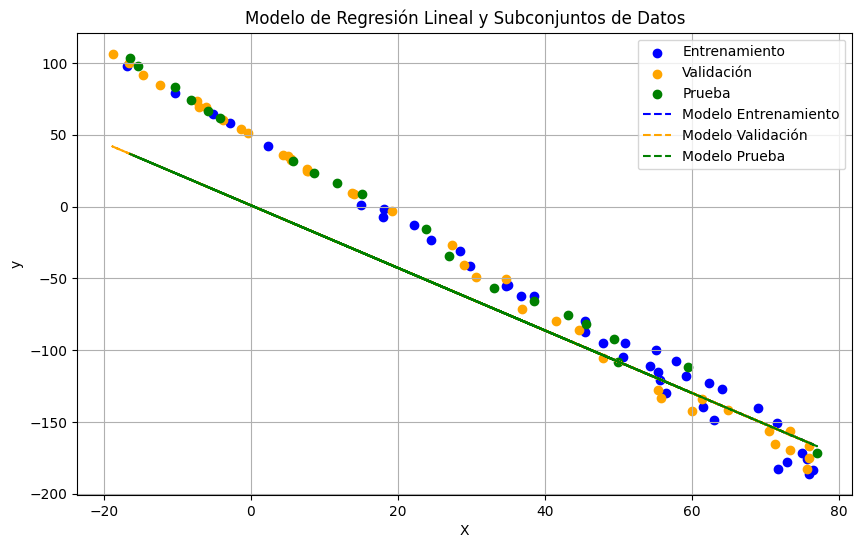

In [21]:
import matplotlib.pyplot as plt

# Crear la gráfica
plt.figure(figsize=(10, 6))

# Graficar los puntos de los subconjuntos
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='orange', label='Validación')
plt.scatter(X_test, y_test, color='green', label='Prueba')

# Graficar las líneas de regresión
plt.plot(X_train, sgd_reg.predict(X_train), color='blue', linestyle='--', label='Modelo Entrenamiento')
plt.plot(X_val, sgd_reg.predict(X_val), color='orange', linestyle='--', label='Modelo Validación')
plt.plot(X_test, sgd_reg.predict(X_test), color='green', linestyle='--', label='Modelo Prueba')

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('y')
plt.title('Modelo de Regresión Lineal y Subconjuntos de Datos')
plt.legend()
plt.grid(True)
plt.show()

## 7. Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

In [22]:
import random

# Generar una lista de números entre 2 y 39
lista = random.sample(range(3, 40), 19)  # Seleccionar 19 números únicos entre 3 y 39
lista.append(2)  # Añadir el número 2
lista = sorted(lista) # Ordenar de menor a mayor
lista

[2, 3, 6, 8, 11, 17, 18, 20, 21, 22, 25, 26, 28, 30, 31, 32, 35, 36, 37, 39]

## 8. Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

## 9. Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación.

## 10. Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento.

In [23]:
from sklearn.utils import resample

# Parámetros del modelo
learning_rate = 1e-4
max_iter = 1_000_000

# Entrenar 100 modelos para cada tamaño de muestra
results = []
mse_train = []
mse_val = []
pro_mse_train = []
pro_mse_val = []

for size in lista:
    for _ in range(100):
        # Seleccionar un subconjunto aleatorio del conjunto de entrenamiento
        X_sample, y_sample = resample(X_train, y_train, n_samples=size, random_state=seed)

        # Crear y entrenar el modelo SGDRegressor
        model = SGDRegressor(learning_rate='constant', eta0=learning_rate, max_iter=max_iter, random_state=seed)
        model.fit(X_sample, y_sample)

        mse_train.append(mean_squared_error(y_sample, model.predict(X_sample)))
        mse_val.append(mean_squared_error(y_val, model.predict(X_val)))
        results.append(model)

    pro_mse_train.append(np.mean(mse_train))
    mse_train = []
    pro_mse_val.append(np.mean(mse_val))
    mse_val = []

## 11. Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

In [24]:
pro_mse_train.append(mean_squared_error(y_train, sgd_reg.predict(X_train)))
pro_mse_val.append(mean_squared_error(y_val, sgd_reg.predict(X_val)))

## 12. Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento.

In [25]:
lista.append(40)

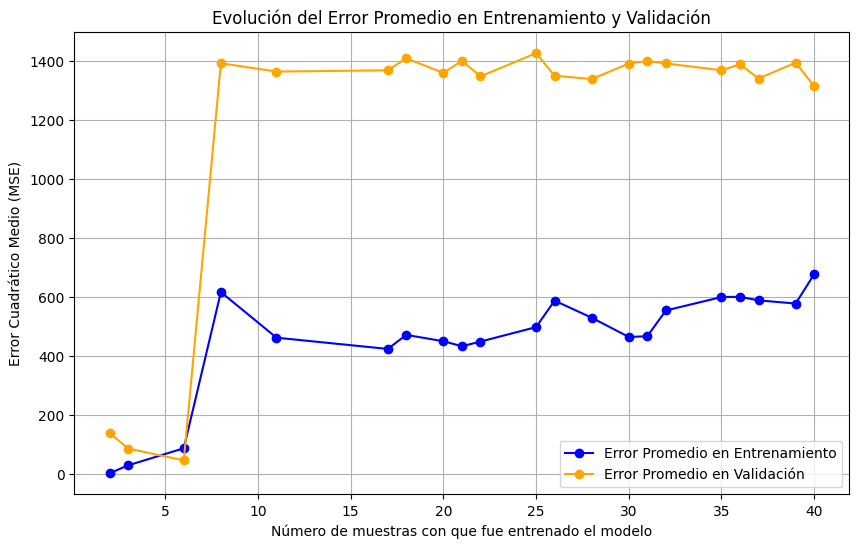

In [26]:
# Crear la gráfica
plt.figure(figsize=(10, 6))

plt.plot(lista, pro_mse_train, label='Error Promedio en Entrenamiento', color='blue', marker='o')
plt.plot(lista, pro_mse_val, label='Error Promedio en Validación', color='orange', marker='o')

plt.xlabel('Número de muestras con que fue entrenado el modelo')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio en Entrenamiento y Validación')
plt.legend()
plt.grid(True)
plt.show()

## 13. Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

El último modelo, entrenado con 40 muestras, muestra un alto error cuadrático medio (MSE) tanto en el conjunto de entrenamiento como en el de validación. Esto indica que el modelo tiene un alto sesgo, lo que significa que es demasiado simple para capturar los patrones subyacentes de los datos. En otras palabras, el modelo no está ajustándose bien a los datos de entrenamiento ni generalizando adecuadamente a los datos de validación. Este alto sesgo se debe a que el modelo no tiene suficiente capacidad para aprender las complejidades de los datos con tan pocas muestras, resultando en un rendimiento deficiente.

Por otro lado, el modelo inicial, entrenado con solo 2 muestras, muestra una reducción significativa en el error de entrenamiento, lo que indica que el modelo está capturando mejor los patrones de los datos. Sin embargo, el error de validación es mayor, lo que sugiere que el modelo podría estar comenzando a sobreajustarse a los datos de entrenamiento. Esto significa que, aunque el modelo tiene un bajo sesgo y se ajusta bien a los datos de entrenamiento, su capacidad para generalizar a nuevos datos no es tan buena, lo que se refleja en un aumento en la varianza.

A medida que se incrementa el número de muestras de entrenamiento de 2 a 40, inicialmente hay un aumento pronunciado en ambos errores, tanto en entrenamiento como en validación. Esto indica un déficit en el ajuste del modelo, ya que no está aprendiendo mejor los patrones de los datos. En esta fase inicial, tanto el sesgo como la varianza aumentan, lo que resulta en un peor rendimiento general del modelo. Sin embargo, después de alcanzar alrededor de 10 muestras, el error de entrenamiento sigue aumentando o se mantiene estable, mientras que el error de validación comienza a fluctuar y, en general, tiende a aumentar ligeramente. Esto sugiere un aumento en la varianza, ya que el modelo se ajusta muy bien a los datos de entrenamiento pero no generaliza tan bien a nuevos datos.

En resumen, el último modelo muestra un alto sesgo y baja varianza debido a su simplicidad y falta de capacidad para aprender de los datos con tan pocas muestras. El modelo inicial, aunque tiene un bajo sesgo, muestra una mayor varianza, lo que indica que está comenzando a sobreajustarse a los datos de entrenamiento. Aumentar el número de muestras inicialmente aumenta tanto el sesgo como la varianza, pero después de cierto punto, principalmente afecta la varianza sin mejorar significativamente el sesgo.

## 14. Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección.

Basándonos en la gráfica de la evolución del error promedio en entrenamiento y validación, podemos observar que el error de validación aumenta significativamente al aumentar el número de muestras hasta alrededor de 10. A partir de este punto, el error de validación comienza a fluctuar y, aunque hay una ligera tendencia al alza, se mantiene relativamente estable.

Entrenar el modelo con alrededor de 10 muestras parece ser la opción más adecuada, ya que proporciona un buen equilibrio entre la reducción del sesgo y el control de la varianza, optimizando así el rendimiento del modelo sin un costo computacional innecesario.

## 15. Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba.

In [27]:
X_sample, y_sample = resample(X_train, y_train, n_samples=10, random_state=seed)

# Crear y entrenar el modelo SGDRegressor
new_model = SGDRegressor(learning_rate='constant', eta0=learning_rate, max_iter=max_iter, random_state=seed)
new_model.fit(X_sample, y_sample)

print("El error medio cuadrático para los datos de entrenamiento es ", mean_squared_error(y_sample, new_model.predict(X_sample)))
print("El error medio cuadrático para los datos de validación es ", mean_squared_error(y_val, new_model.predict(X_val)))
print("El error medio cuadrático para los datos de prueba es ", mean_squared_error(y_test, new_model.predict(X_test)))

El error medio cuadrático para los datos de entrenamiento es  477.3092257488162
El error medio cuadrático para los datos de validación es  1353.8592510099352
El error medio cuadrático para los datos de prueba es  1631.2928692816085


## 16. Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5).

Para el modelo base:

    El error medio cuadrático para los datos de entrenamiento es  677.9026786830233

    El error medio cuadrático para los datos de validación es  1315.3818826335985

    El error medio cuadrático para los datos de prueba es  1556.266964215807

Para el modelo entrenado con 10 datos:

    El error medio cuadrático para los datos de entrenamiento es  477.3092257488162

    El error medio cuadrático para los datos de validación es  1353.8592510099352

    El error medio cuadrático para los datos de prueba es  1631.2928692816085

Se observa que el error de entrenamiento del modelo de 10 datos es menor que el del base, pero el modelo base tiene menor error en la validación y prueba.

## 17. Argumenta cuál configuración funcionó mejor, y por qué.

Aunque el modelo entrenado con 10 muestras muestra una mejora en el ajuste a los datos de entrenamiento, su capacidad de generalización a nuevos datos no es tan buena como la del modelo base. Esto se refleja en los errores de validación y prueba más altos. Por lo tanto, aunque 10 muestras pueden ser adecuadas para reducir el sesgo, es importante considerar técnicas adicionales para controlar la varianza y mejorar la generalización del modelo. Por lo que, la mejor configuración sigue siendo la base, pues se adapta mejor a los nuevos datos.

## 18. Para facilitar la revisión, entrega dos archivos. El primero debe ser un Jupyter Notebook con todo el desarrollo (código comentado). El segundo debe ser un PDF del Jupyter Notebook. Revisa las instrucciones del primer entregable para ver cómo exportar el archivo HTML y posteriormente pasarlo a PDF.

In [34]:
!jupyter nbconvert --to html '/content/gdrive/MyDrive/Colab Notebooks/Desempeño_Modelo_A01742342.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Colab Notebooks/Desempeño_Modelo_A01742342.ipynb to html
[NbConvertApp] Writing 786069 bytes to /content/gdrive/MyDrive/Colab Notebooks/Desempeño_Modelo_A01742342.html


## 19. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.